# Data visualization techniques using matplotlib and seaborn

Hello! In this notebook I intend to present different plotting techniques using the house prices dataset. I am using the seaborn library, which provides a high-level interface to matplotlib. Moreover, although the main goal here is to introduce the main aspects of the library, I will also show how to custom stuff that are not very common or found in online tutorial.

I will not provide details about the dataset's attributes along the path, but you can find the full description here. Also, I will use pandas for data manipulation and numpy to make some log transformations when necessary, you can find the code for that in the utils.py file.

## Contents:
- Overview
    - Histogram
    - Box/swarm/violin plot
    - Bar plot
    - Scatter plot
    - Line plot
    - Heatmap
- Multi-plot grids
    - Subplots
    - Pairplots and PairGrid
    - FacetGrid
- Custom techniques
    - Seaborn and matplotlib default
    - Personal customize

# Overview
## Reading data

Notice that I already am reading the categorical and numerical data separately. Let's start the analysis using numerical data only!

In [1]:
import utils
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data, cat_cols, num_cols = utils.read_data(return_type_cols=True)
print(data.head())

    MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                       
1           60       RL     8450   Pave      Reg         Lvl    AllPub   
2           20       RL     9600   Pave      Reg         Lvl    AllPub   
3           60       RL    11250   Pave      IR1         Lvl    AllPub   
4           70       RL     9550   Pave      IR1         Lvl    AllPub   
5           60       RL    14260   Pave      IR1         Lvl    AllPub   

   LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                   ...                                       
1     Inside       Gtl      CollgCr  ...             0         0           0   
2        FR2       Gtl      Veenker  ...             0         0           0   
3     Inside       Gtl      CollgCr  ...             0         0           0   
4     Corner       Gtl      Crawfor  ...           272         0           0   
5

In [2]:
data.describe().loc[['min', 'max', 'mean', 'std'], :]

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
min    20.000000    1300.000000     1.000000     1.000000  1872.000000   
max   190.000000  215245.000000    10.000000     9.000000  2010.000000   
mean   56.897260   10516.828082     6.099315     5.575342  1971.267808   
std    42.300571    9981.264932     1.382997     1.112799    30.202904   

      YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
min    1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
max    2010.000000  5644.000000  1474.000000  2336.000000  6110.000000  ...   
mean   1984.865753   443.639726    46.549315   567.240411  1057.429452  ...   
std      20.645407   456.098091   161.319273   441.866955   438.705324  ...   

      WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
min     0.000000     0.000000       0.000000    0.000000     0.000000   
max   857.000000   547.000000     552.000000  508.000000   480.000000   
mean   94.244521    46.660274      21.954110    3.409589    15.060959   
std   125.338794    66.256028      61.119149   29.317331    55.757415   

        PoolArea       MiscVal     MoSold       YrSold      SalePrice  
min     0.000000      0.000000   1.000000  2006.000000   34900.000000  
max   738.000000  15500.000000  12.000000  2010.000000  755000.000000  
mean    2.758904     43.489041   6.321918  2007.815753  180921.195890  
std    40.177307    496.123024   2.703626     1.328095   79442.502883  

[4 rows x 34 columns]

## Histograms

Histograms are usually employed to evaluate the data distribution. In the following plot, we can visualize the distribution of the SalePrice column.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

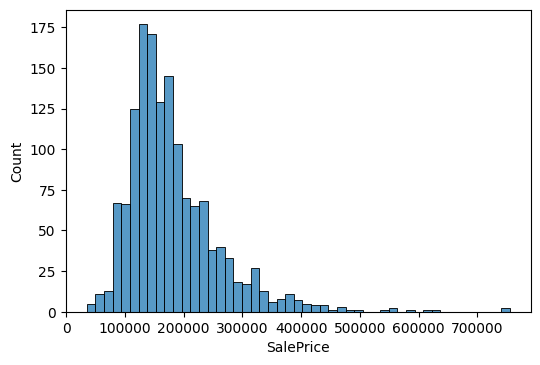

In [3]:
plt.figure(figsize=(6, 4), dpi=100)
sns.histplot(x='SalePrice', data=data)

Notice that it presents a long tail distribution. As for data visualization as for data cleaning, it is always interesting manipulate the data as a normal distribution. We can easily accomplish it by applying a log transformation. Note: for undoing this transformation, apply the np.exp function.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

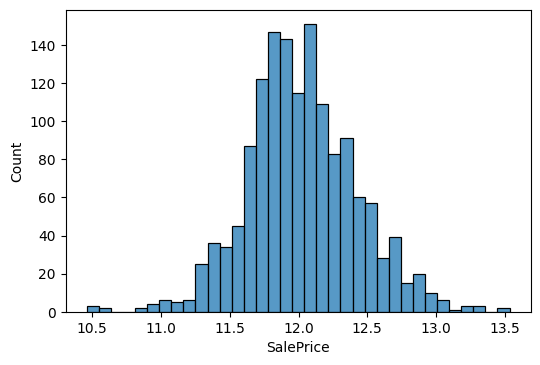

In [4]:
plt.figure(figsize=(6, 4), dpi=100)
data.SalePrice = data.SalePrice.apply(np.log)
sns.histplot(x='SalePrice', data=data)

## Boxplot

This is an alternative technique to evaluate data distribution. Let's see. how the SalePrice column is distributed over each class of the OverallQual column.

We can notice that as bigger the OverallQual value, the higher is the overall SalePrice distribution.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

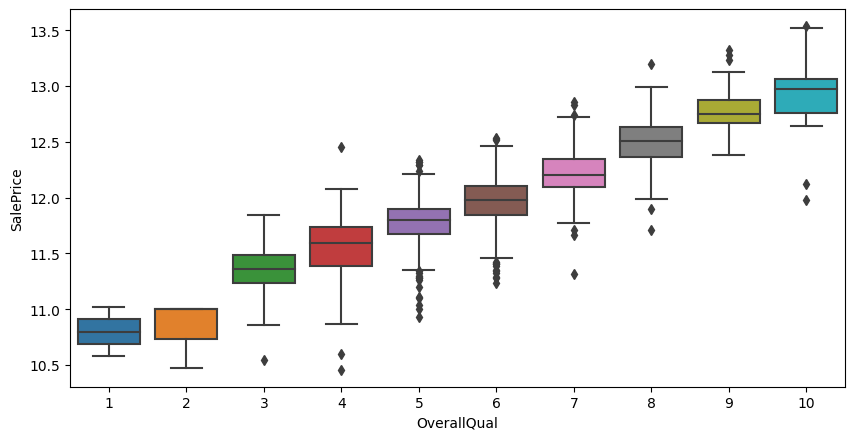

In [5]:
plt.figure(figsize=(10, 5), dpi=100)
sns.boxplot(x='OverallQual', y='SalePrice', data=data)

Alternatively, we can use the violinplot or the swarmplot with the same purposes.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

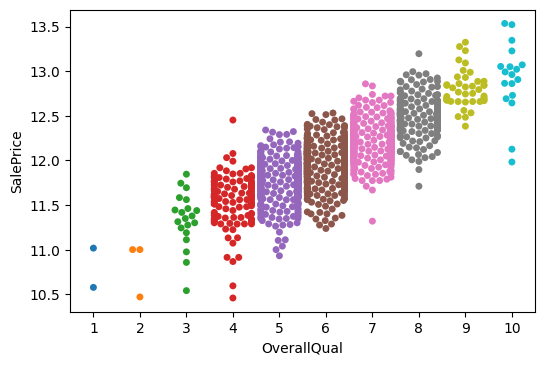

In [6]:
plt.figure(figsize=(6, 4), dpi=100)
# sns.violinplot(x='OverallQual', y='SalePrice', data=data)
sns.swarmplot(x='OverallQual', y='SalePrice', data=data)

We can also combine both methods.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

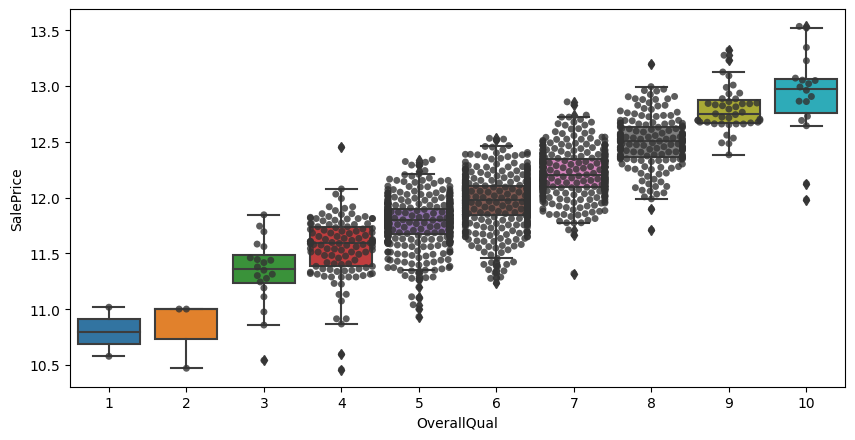

In [7]:
plt.figure(figsize=(10, 5), dpi=100)
sns.swarmplot(x='OverallQual', y='SalePrice', data=data, color='.2', alpha=0.8)
sns.boxplot(x='OverallQual', y='SalePrice', data=data)

We can use violin plot to find features that well separate classes. In this toy example, we can see that 'Ex' houses present a higher SalePrice mean than 'Gd'. On the other hand, the LotArea has a similar mean for both classes, which means that this feature may not be suitable for predicting ExterQual.

<AxesSubplot:xlabel='features', ylabel='values'>

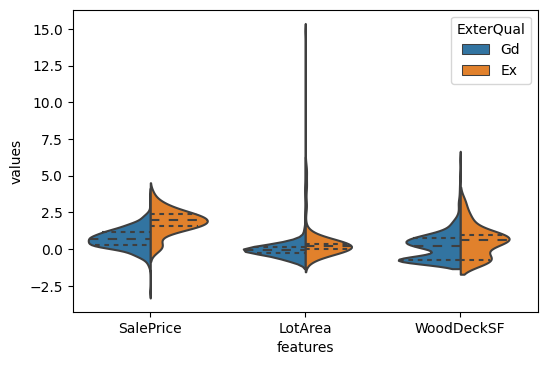

In [8]:
x = data.loc[:, ['SalePrice', 'LotArea', 'WoodDeckSF']].copy()
x = (x - x.mean()) / x.std()
x['ExterQual'] = data['ExterQual']
x = x[x.ExterQual.isin(['Gd', 'Ex'])]
x = pd.melt(x, id_vars='ExterQual', var_name='features', value_name='values')

plt.figure(figsize=(6, 4), dpi=100)
sns.violinplot(x='features', y='values', hue='ExterQual', data=x, split=True, inner='quart')

## Barplot

Using the previous example, we can also visualize those columns using barplots. However, when we are evaluating the distribution of a certain column, this technique is not the best approach.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

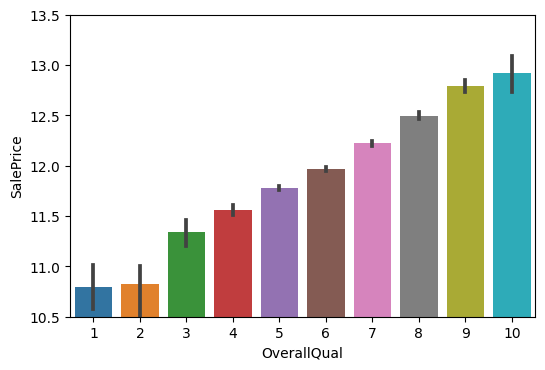

In [9]:
plt.figure(figsize=(6, 4), dpi=100)
plt.ylim(10.5, 13.5)
sns.barplot(x='OverallQual', y='SalePrice', data=data)

Another example of barplots, let's count the number of occurrences of each category in the Neighborhood column. 

Obs: Notice that sometimes I may use some particular methods, not realted to the plot technique, such as the rotation in this example, but I intend to further explain these tricks.

<AxesSubplot:xlabel='Name', ylabel='Neighborhood'>

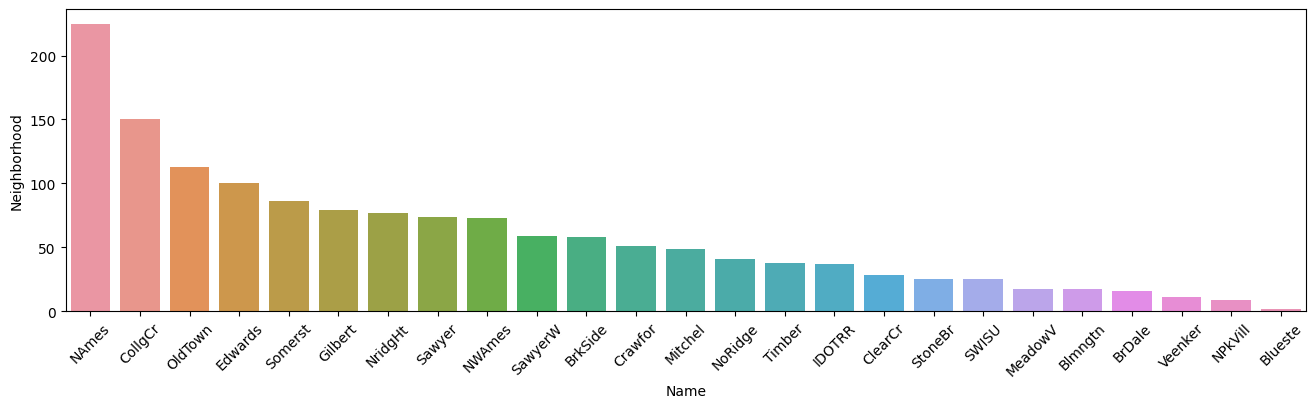

In [10]:
neigh_count = data.Neighborhood.value_counts().to_frame().reset_index().rename(columns={'index': 'Name'})

plt.figure(figsize=(16, 4), dpi=100)
plt.xticks(rotation=45)
sns.barplot(x='Name', y='Neighborhood', data= neigh_count)

## Scatter plot

This techinque is frequently employed to find correlations between two attributes. Let's start by analysing if the SalePrice column has any relation with the LotArea column. Before that, let's first apply a log transformation over LotArea column too.

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

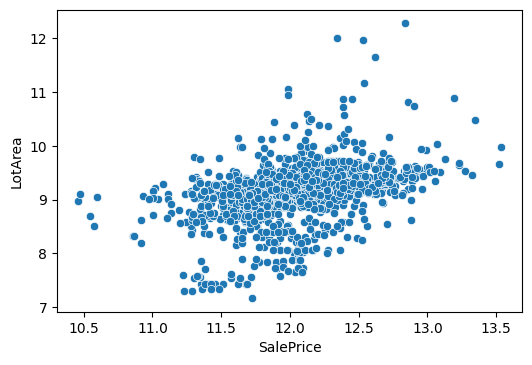

In [11]:
plt.figure(figsize=(6, 4), dpi=100)
data.LotArea = data.LotArea.apply(np.log)
sns.scatterplot(x='SalePrice', y='LotArea', data=data)

We can estimate this slightly relation by employing a linear regression model. Seaborn provides the method regplot that allows us to perform it.

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

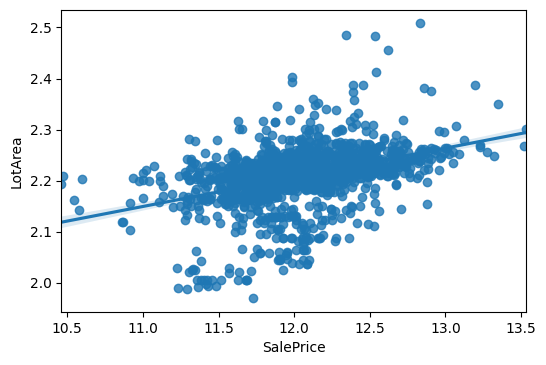

In [12]:
plt.figure(figsize=(6, 4), dpi=100)
data.LotArea = data.LotArea.apply(np.log)
sns.regplot(x='SalePrice', y='LotArea', data=data)

We can also add a third column in order to group this data. In the next example we use the ExterQual column to understand how data is behaving.

Obersving the plot we can conclude that, in general, when ExterQual is 'Ex', the overall SalePrice is higher. Also, when ExterQual is 'Fa', the LotArea is smaller and the SalePrice is lower.

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

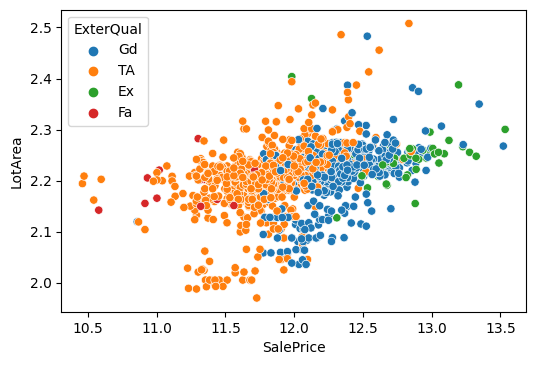

In [13]:
plt.figure(figsize=(6, 4), dpi=100)
sns.scatterplot(x='SalePrice', y='LotArea', hue='ExterQual', data=data)

## Line plot

As an example of line plot, we will visualize how the average Sale Price has behaved over the YrSold column.

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

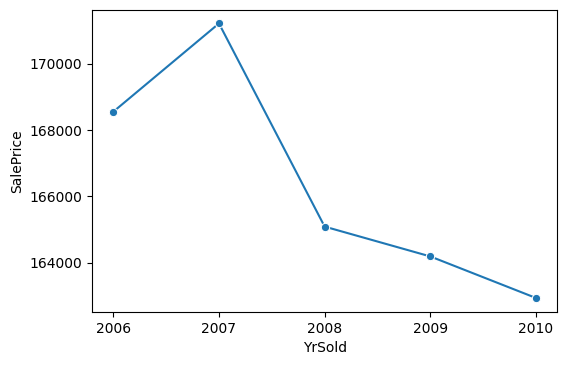

In [14]:
group_by_year = data.groupby('YrSold').SalePrice.mean().to_frame().reset_index()
group_by_year.SalePrice = group_by_year.SalePrice.apply(np.exp)
group_by_year.YrSold = group_by_year.YrSold.astype('str')

plt.figure(figsize=(6, 4), dpi=100)
sns.lineplot(x='YrSold', y='SalePrice', data=group_by_year, marker='o')

## Heatmaps

Heatmaps are frequently employed for visualizing correlation among columns. Notice that the correlation includes only numerical columns.

<AxesSubplot:>

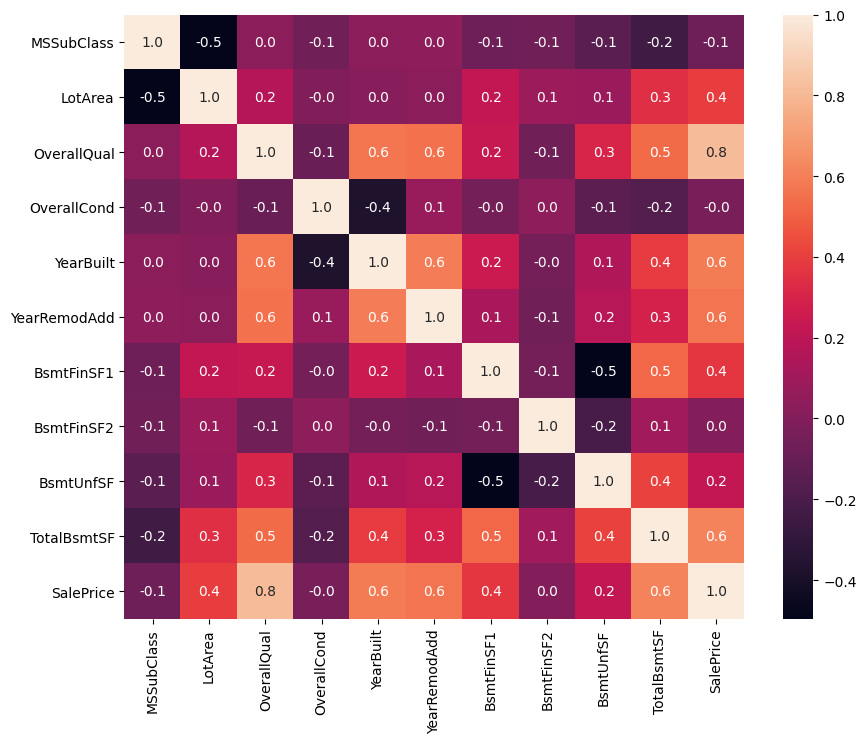

In [15]:
cols = np.append(num_cols[:10], 'SalePrice')

plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1f')

# Multi-plot grids
## Subplots

Using subplots from pyplot allows us to generate grids with several plots. We can control different aspect, such as the shared axis and the number of rows/cols.

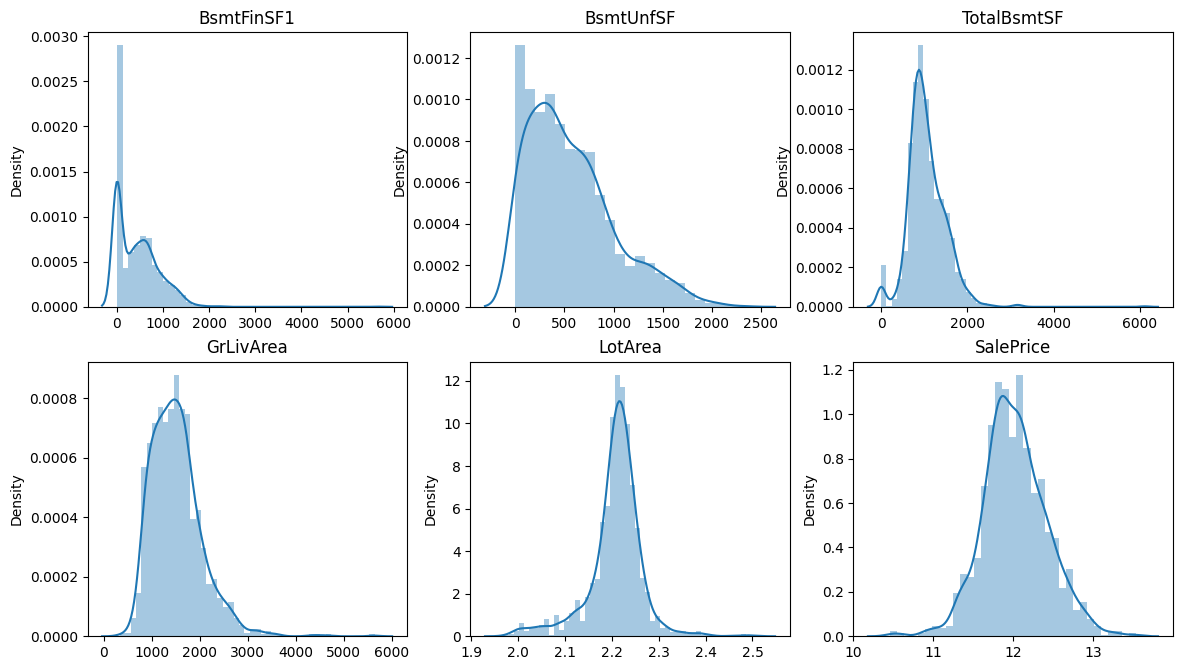

In [49]:
features = ['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'LotArea', 'SalePrice']
x = data[features].copy()

fix, axes = plt.subplots(2, 3, dpi=100, figsize=(14,8))
axes = iter(axes.reshape(-1))
for ax, feat in zip(axes, features):
    ax.set_title(feat)
    sns.distplot(x=x.loc[:, feat], ax=ax)

## Pairgrid

This is a good approach for visualizing the correlation among features. Let's normalize data to guarantee a better visualization.

<Figure size 1200x400 with 0 Axes>

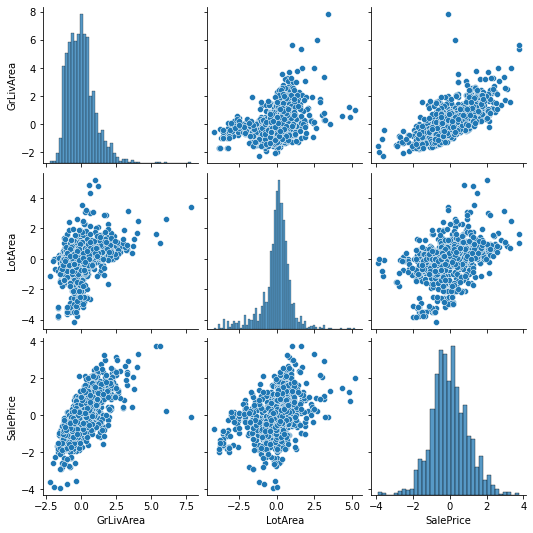

In [53]:
x = (x - x.mean()) / x.std()
plt.figure(figsize=(12, 4), dpi=100)
sns.pairplot(x.iloc[:, 3:])

## PairGrid

This function from seaborn allows us to map different plot functions through the matrix of pair plots. In this example we are using the scatter for upper diagonal, as the previous example. For diagonal we can employ boxplots, and for lower diaganal we can see the kdeplot showing the density between features.

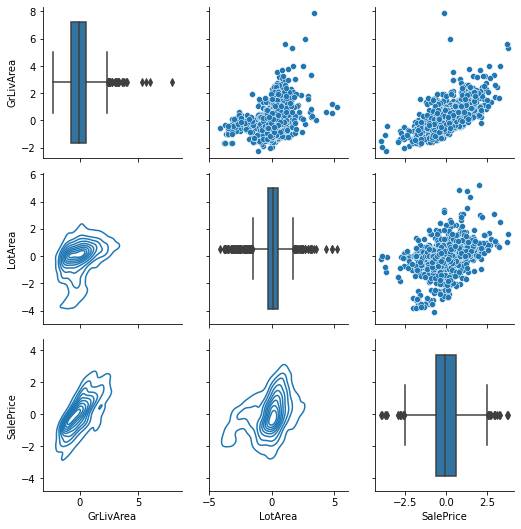

In [64]:
# plt.figure(figsize=(12, 4), dpi=100)
g = sns.PairGrid(x.iloc[:, 3:], diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_diag(sns.boxplot)
g.map_upper(sns.scatterplot)


## FacetGrid
This method from seaborn allows the visualization of conditional relationships. Ideally, we select two binary features to see how our goal features (LotArea, SalePrice) are behaving. In this example, I created a Toy features to exemplify the conditional requirement.

<Figure size 1200x400 with 0 Axes>

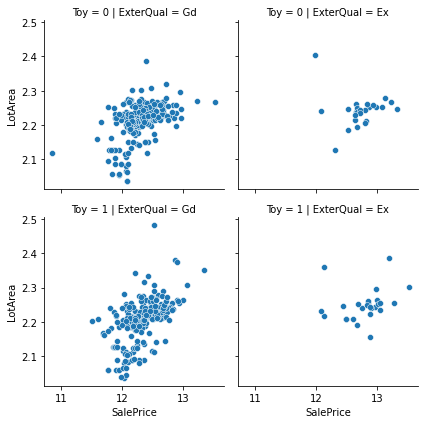

In [79]:

features = ['ExterQual', 'LotArea', 'SalePrice']
x = data[features].copy()
x['Toy'] = np.where(x.index % 2 == 0, 1, 0)
x = x[x.ExterQual.isin(['Gd', 'Ex'])]

g = sns.FacetGrid(x, col="ExterQual",  row="Toy")
g.map(sns.scatterplot, "SalePrice", "LotArea")